# KerasCV Object Detection Inference
https://keras.io/guides/keras_cv/object_detection_keras_cv/

In [1]:
try:
    import keras_core as keras
except:
    !pip install keras_core
    import keras_core as keras

try:
    import keras_cv
except:
    !pip -q install keras_cv
    import keras_cv

import os
import resource
import tqdm

import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import optimizers

from keras_cv import bounding_box
from keras_cv import visualization

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.0/728.0 kB 11.7 MB/s eta 0:00:00
Using TensorFlow backend
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.2/756.2 kB 11.7 MB/s eta 0:00:00


# Basic Inference

In [2]:
# Load model.

# Retinanet.
"""
pretrained_model = keras_cv.models.RetinaNet.from_preset(
    "retinanet_resnet50_pascalvoc",
    bounding_box_format="xywh"
)
""";

# Yolov8.
pretrained_model = keras_cv.models.YOLOV8Detector.from_preset(
    "yolo_v8_m_pascalvoc",
    bounding_box_format="xywh"
)

104144184/104144184 [==============================] - 5s 0us/step


In [3]:
# Pascal VOC classes.

class_ids = [
    "Aeroplane",
    "Bicycle",
    "Bird",
    "Boat",
    "Bottle",
    "Bus",
    "Car",
    "Cat",
    "Chair",
    "Cow",
    "Dining Table",
    "Dog",
    "Horse",
    "Motorbike",
    "Person",
    "Potted Plant",
    "Sheep",
    "Sofa",
    "Train",
    "Tvmonitor",
    "Total",
]
class_mapping = dict(zip(range(len(class_ids)), class_ids))

1215963/1215963 [==============================] - 1s 1us/step


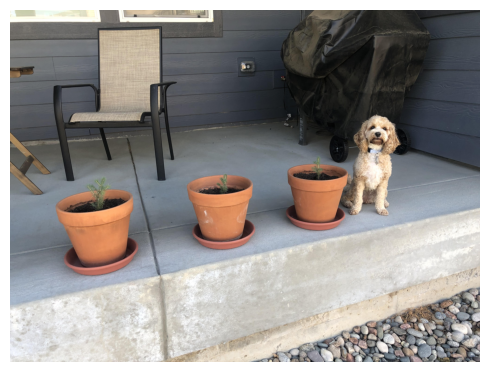

In [4]:
# Load image.

filepath = tf.keras.utils.get_file(origin="https://i.imgur.com/gCNcJJI.jpg")
image = keras.utils.load_img(filepath)
image = np.array(image)

visualization.plot_image_gallery(
    np.array([image]),
    value_range=(0, 255),
    rows=1,
    cols=1,
    scale=5,
)

In [5]:
# Preprocessing for inference.

inference_resizing = keras_cv.layers.Resizing(
    640, 640, pad_to_aspect_ratio=True, bounding_box_format="xywh"
)

In [6]:
# Inference.

image_batch = inference_resizing([image])

1/1 [==============================] - 15s 15s/step


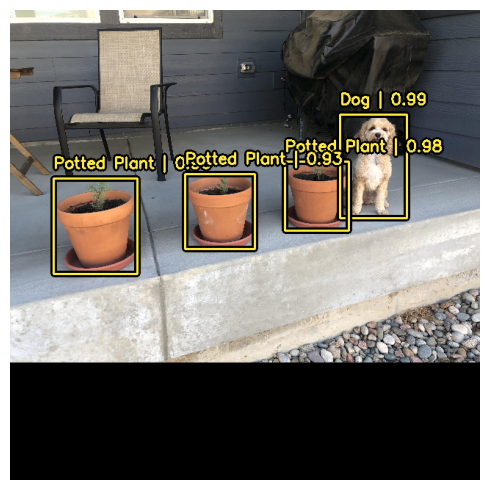

In [7]:
# Visualizations.

y_pred = pretrained_model.predict(image_batch)
# y_pred is a bounding box Tensor:
# {"classes": ..., boxes": ...}

visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=class_mapping,
)